# Banking Business Case

Problem Statement: A major bank in Middle East came to NeoStats with help in analysing its current customer base and its marketing campaigns. It wants to understand which customers are most likely to take a term deposit (fixed deposit), and then send this list to their call centre.

The data has been provided in attached excel sheet. You as NeoStats employee are tasked with carrying out this project. Please carry out the analysis and answer the questions given below. 
Make suitable assumptions, define the steps clearly and document your code when required. 


#  Data Science  Project 

# Step-1) Feature Engineering --
                                 1) EDA and Data preprocessing 
                                 2) Handling missing values
                                 3) Handling outliers 
                                 4) Categorical Encoding 
                                 5) Standardization or Normalization

# Step-2) Feature Selection --
                                 1) Correlation 
                                 2) Univariate selection 
                                 3) Principal Component Analysis-dimention reduction technique
                                 


# Step-3) Model creation and hyperparameter tuning --
                                 1) Grid search cv
                                 2) Randomized search cv
                                 3) Optuna

In [1]:
#importing libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

C:\Users\HP\Documents\ANACONDA\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Exploratory Data Analysis(EDA)

In [2]:
df1=pd.read_excel('Banking Case - Data.xlsx',sheet_name =0)

In [3]:
df2=pd.read_excel('Banking Case - Data.xlsx',sheet_name =1)

In [4]:
df3=pd.read_excel('Banking Case - Data.xlsx',sheet_name =2)

In [5]:
df2.isnull().sum()# To check null values in df2

Sno                  0
Customer_number      0
Insurance            0
balance             55
housing              0
loan                 8
contact             43
duration            39
campaign             0
last_contact_day     0
previous             0
poutcome            15
Term Deposit         8
Count_Txn            1
dtype: int64

In [6]:
df3.isnull().sum()# To check null values in df3

Customer_number     0
age                 0
job                13
marital            18
education          21
Annual Income      17
Gender              0
dtype: int64

# Handling missing values 

There are two approach to deal with null values .
1) Dropping all null values 
2) Imputation of values according to the data for example we can use mean , median and mode .
   mean imputation = if the data is following normal distribution we can compute mean.
   median imputation = if there are some extreme values (outlier) in data we can go with median.
   mode imputation = Basically used for categorical data .
#But in this dataset the null values are less than 2% of the data so we can drop null values because there will be minimal loss of information.

In [7]:
df2_new = df2.dropna()

In [8]:
df3_new = df3.dropna()

In [9]:
#merging dataset based on customer number using inner join and droping sno.
merged_df = pd.merge(df2_new, df3_new, on='Customer_number', how='inner').drop(columns=['Sno'],)

In [10]:
merged_df.columns# target variable(dependent feature) =Term Deposit , rest all are independent feature 

Index(['Customer_number', 'Insurance', 'balance', 'housing', 'loan', 'contact',
       'duration', 'campaign', 'last_contact_day', 'previous', 'poutcome',
       'Term Deposit', 'Count_Txn', 'age', 'job', 'marital', 'education',
       'Annual Income', 'Gender'],
      dtype='object')

In [11]:
merged_df.shape #checking shape of data df2 

(44982, 19)

In [12]:
merged_df.describe()#this is the basic information about numeric data in the data frame 

,Customer_number,duration,campaign,last_contact_day,previous,Count_Txn,age
count,44982.000000,44982.000000,44982.000000,44982.000000,44982.000000,44982.000000,44982.000000
mean,23667.314526,258.142035,2.759659,41.994598,0.582344,299.629052,40.971211
std,13026.075580,257.636731,3.083343,99.628436,2.307927,115.604576,10.828637
min,1002.000000,-167.000000,0.000000,-7.000000,0.000000,-423.000000,18.000000
25%,12399.250000,103.000000,1.000000,1.000000,0.000000,200.000000,33.000000
50%,23692.500000,180.000000,2.000000,1.000000,0.000000,300.000000,39.000000
75%,34942.750000,319.000000,3.000000,1.000000,0.000000,399.000000,48.000000
max,46211.000000,4918.000000,63.000000,871.000000,275.000000,499.000000,121.000000


# Data Analysis & Visualization:

# Answer-1) Income Insights:
•	How many customers have no annual income? Plot and present the data distribution of these customers


In [16]:
merged_df.dtypes

Customer_number       int64
Insurance            object
balance              object
housing              object
loan                 object
contact              object
duration            float64
campaign              int64
last_contact_day      int64
previous              int64
poutcome             object
Term Deposit         object
Count_Txn           float64
age                   int32
job                  object
marital              object
education            object
Annual Income        object
Gender               object
dtype: object

In [19]:
customers_no_income = merged_df[merged_df['Annual Income'] == '0']
num_customers_no_income = len(customers_no_income)
print(f"Number of customers with no annual income: {num_customers_no_income}")

Number of customers with no annual income: 0


# From above analysis no customer identified with annual income 0. 

# Answer-2) Loan-less Customers Profile:
•	Filter out customers who don’t have any type of loan. Plot the distribution of their Income, balance, and profession. How do these metrics differ from those with loans?


In [17]:
loanless_customer=(merged_df['loan'] == 'no').sum()

In [18]:
loanless_customer # There are 37778 customers having no loan profile .
# The nnumber of customer having loan =7204.

37778

# Note--From this observation we can say that our data is imbalance so before making model we have to deal with this using SMOTE(Synthetic Minority Over-sampling Technique).

In [19]:
merged_df.columns # total features is the given data set = 19

Index(['Customer_number', 'Insurance', 'balance', 'housing', 'loan', 'contact',
       'duration', 'campaign', 'last_contact_day', 'previous', 'poutcome',
       'Term Deposit', 'Count_Txn', 'age', 'job', 'marital', 'education',
       'Annual Income', 'Gender'],
      dtype='object')

In [20]:
loan_categories = merged_df['loan'].value_counts()
print("Categories in Loan column:")
print(loan_categories)


Categories in Loan column:
loan
no     37778
yes     7204
Name: count, dtype: int64


In [21]:
loan_categories_unique = merged_df['loan'].unique()
print(loan_categories_unique)


['no' 'yes']


In [22]:
#creating new variable for yes and no loan profile customers.
loan_yes_df = merged_df[merged_df['loan'] == 'yes']
loan_no_df = merged_df[merged_df['loan'] == 'no']


In [23]:
loan_yes_df.shape

(7204, 19)

In [24]:
loan_no_df.shape #maximum number of customers having no loan profile 

(37778, 19)

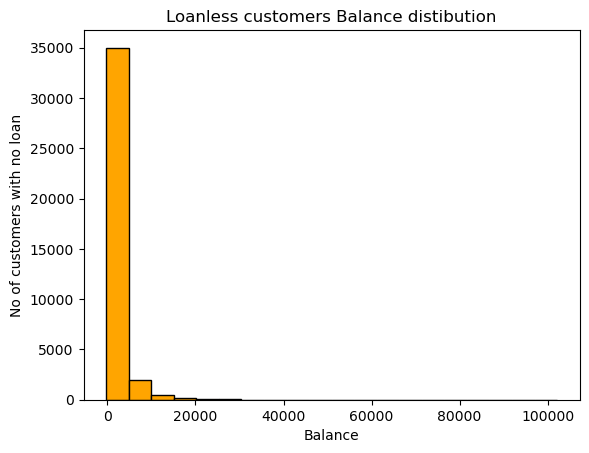

In [25]:
loan_no_df['balance'] = pd.to_numeric(loan_no_df['balance'], errors='coerce')
plt.hist(loan_no_df['balance'].dropna(), bins=20, color='orange', edgecolor='black')
plt.title('Loanless customers Balance distibution')
plt.xlabel('Balance')
plt.ylabel('No of customers with no loan')
plt.show()

# Insight - Histogram stating that the customers dont have any type of loan are higher so we can target these customers for term deposit subscription and we can frame some policies for these customers. 

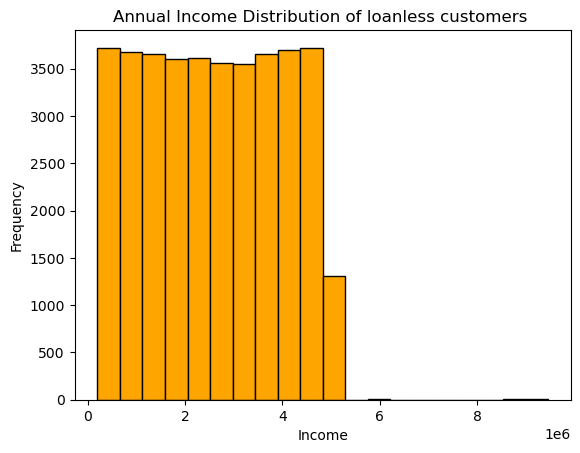

In [26]:
# changing datatype
loan_no_df['Annual Income'] = pd.to_numeric(loan_no_df['Annual Income'], errors='coerce')

# Histogram
plt.hist(loan_no_df['Annual Income'].dropna(), bins=20, color='orange', edgecolor='black')
plt.title('Annual Income Distribution of loanless customers ')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


# Insight- A uniformly distributed annual income signifies that each income level within the population is equally probable. This suggests a fair and unbiased distribution across all income brackets, highlighting an equitable financial landscape where every individual has an equal chance of falling into any income category.

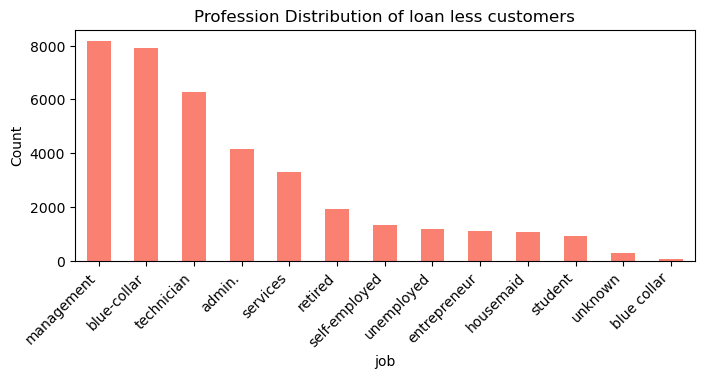

In [27]:
# Plot the distribution of job for customers with no loan
plt.figure(figsize=(8, 3))
loan_no_df['job'].value_counts().plot(kind='bar', color='salmon')
plt.title('Profession Distribution of loan less customers')
plt.xlabel('job')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Insight-From the above distribution it's evident that customers without loans predominantly consist of individuals from management and blue-collar professions. This insight suggests an opportunity to tailor exclusive offers and incentives targeting these specific demographics. Implementing feedback mechanisms and strategic initiatives can further enhance customer engagement and satisfaction within these segments, optimizing overall marketing effectiveness and fostering long-term relationships.

# Answer-3) Loan and Insurance Analysis:
•Calculate the percentage of customers with a loan who have taken out insurance. Visualize this data and discuss potential implications.


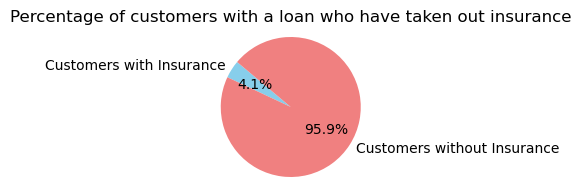

Percentage of customers with a loan who have taken out insurance: 4.12%


In [28]:
loan_customers_df = merged_df[merged_df['loan'] != 'no']
customers_with_insurance = loan_customers_df[loan_customers_df['Insurance'] == 'yes']
percentage_insurance = (len(customers_with_insurance) / len(loan_customers_df)) * 100

labels = ['Customers with Insurance', 'Customers without Insurance']
sizes = [len(customers_with_insurance), len(loan_customers_df) - len(customers_with_insurance)]
colors = ['skyblue', 'lightcoral']
# pie-chart visualisation
plt.figure(figsize=(4, 2))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of customers with a loan who have taken out insurance')
plt.axis('equal')  
plt.show()
print(f"Percentage of customers with a loan who have taken out insurance: {percentage_insurance:.2f}%")

# Insight-The insight gleaned from the data reveals that only a small proportion (4.12%) of customers with loans have opted for insurance coverage. This finding underscores an untapped opportunity to explore potential correlations between loan status and insurance subscription behavior, suggesting avenues for targeted marketing strategies to increase insurance uptake among this customer segment

# Answer-4) Communication Strategy Insights:
•	Analyse and summarize the best Contact method (with the highest success percentage) to contact people to ascertain the status of term deposit subscriptions.


In [29]:
merged_df['Term Deposit'] = merged_df['Term Deposit'].map({'yes': 1, 'no': 0})
#conversion rate calculation
conversion_rate = merged_df.groupby('contact')['Term Deposit'].mean() * 100
best_contact_method = conversion_rate.idxmax()
highest_conversion_rate = conversion_rate.max()
print(f"The best Contact method (with the highest success percentage) to contact people to ascertain the status of term deposit subscriptions {best_contact_method} with a conversion rate of {highest_conversion_rate:.2f}%.")

The best Contact method (with the highest success percentage) to contact people to ascertain the status of term deposit subscriptions Tel with a conversion rate of 55.56%.


# Analysis-Based on the analysis, it's evident that telephone contact emerges as the most effective channel for successful term deposit conversion. This insight suggests prioritizing telephone outreach strategies to engage customers, leveraging direct communication to potentially enhance conversion rates and optimize marketing efforts in promoting term deposit subscriptions.

# Answer-5) Age and Home Loans:
•	Determine which age group has the highest percentage of home loans. Present this data visually and discuss possible reasons.


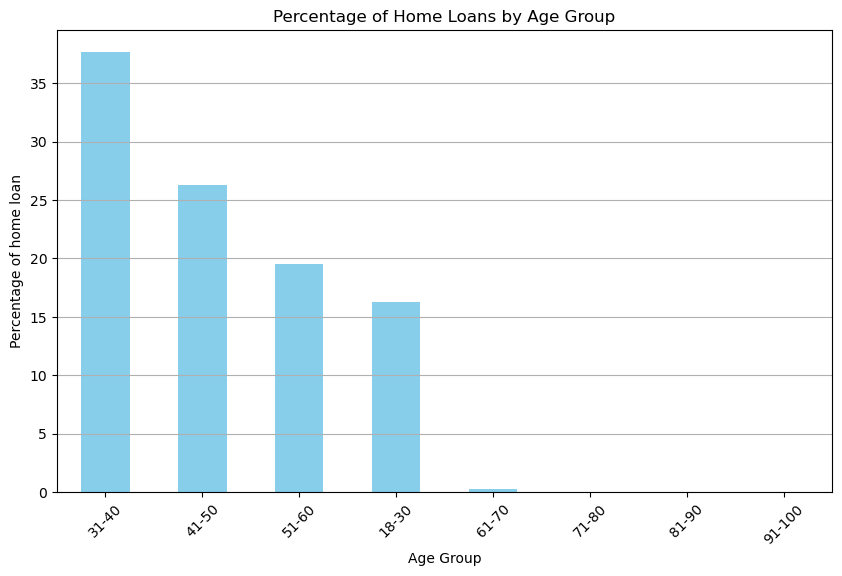

Percentage of Home Loans by Age Group:
age_group
31-40     37.673515
41-50     26.249306
51-60     19.544697
18-30     16.254858
61-70      0.235980
71-80      0.027762
81-90      0.000000
91-100     0.000000
Name: count, dtype: float64


In [30]:
home_loan_df = merged_df[merged_df['loan'] == 'yes']
#bin size 
bins = [18, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['18-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
home_loan_df['age_group'] = pd.cut(home_loan_df['age'], bins=bins, labels=labels)
percentage_by_age_group = (home_loan_df['age_group'].value_counts() / len(home_loan_df)) * 100

#visualisation
plt.figure(figsize=(10, 6))
percentage_by_age_group.plot(kind='bar', color='skyblue')
plt.title('Percentage of Home Loans by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage of home loan')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
#insight
print("Percentage of Home Loans by Age Group:")
print(percentage_by_age_group)

# Insight-The distribution of home loans across different age groups reveals interesting insights. The age group 31-40 holds the highest percentage (37.67%) of home loans, followed by the 41-50 age group (26.25%), suggesting that individuals in their thirties and forties are more likely to invest in home ownership. Conversely, the older age groups (61-70, 71-80, 81-90, and 91-100) exhibit minimal to no participation in home loan subscriptions, indicating potential demographic trends or preferences that could inform targeted marketing strategies or product offerings.

# Answer-6) Income and Age Relationship:
•	Investigate any relationships between annual income and age group. Use appropriate plots and statistics to present the findings.


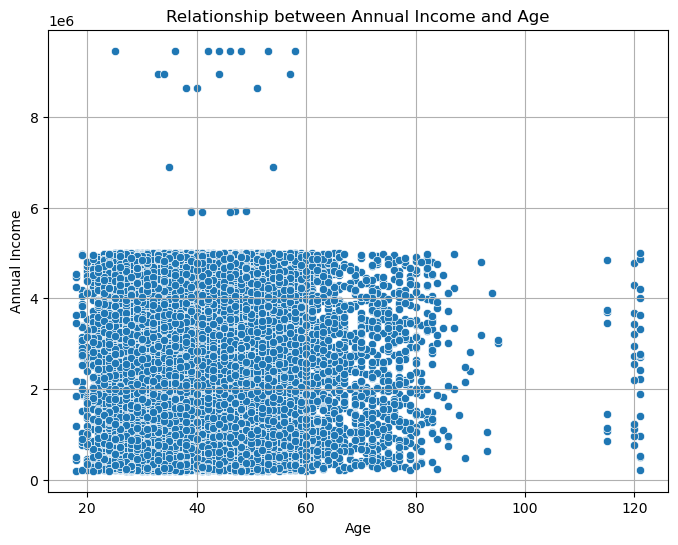

corr Coefficient between Annual Income and Age: 0.0011923693772973396


In [31]:
merged_df['Annual Income'] = pd.to_numeric(merged_df['Annual Income'], errors='coerce')
merged_df['age'] = pd.to_numeric(merged_df['age'], errors='coerce')
#visualisation
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='Annual Income', data=merged_df)
plt.title('Relationship between Annual Income and Age')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.grid(True)
plt.show()
# correlation coffient calculation
corr_coefficient = merged_df['Annual Income'].corr(merged_df['age'])
print("corr Coefficient between Annual Income and Age:", corr_coefficient)

# Insight-The scatter plot analysis indicates a negligible positive correlation (correlation coefficient: 0.0012) between age and annual income. This finding suggests that while there may be a slight tendency for income to increase marginally with age, the relationship is weak, highlighting the influence of other factors beyond age alone on income levels.

# Modeling:

# Steps- 1) Feature Engineering ---
                                 a) EDA.
                                 b) Handling missing values(already done).
                                 c) Handling outliers. 
                                 d) Categorical encoding .
                                 e)Standardization and normalization.

# Answer-1) Term Deposit and Related Variables:
Identify variables strongly related to Term Deposit. Discuss your approach when the variable is categorical. Which tests or metrics will you employ?


In [32]:
#Identifying the categorical variables .
datatypes = merged_df.dtypes
categorical_vars = [col for col, dtype in datatypes.items() if dtype == 'object' or dtype.name == 'category']
print("Categorical Variables:")
print(categorical_vars)

Categorical Variables:
['Insurance', 'balance', 'housing', 'loan', 'contact', 'poutcome', 'job', 'marital', 'education', 'Gender']


In [33]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# defining a function 
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

categorical_vars = ['Insurance', 'balance', 'housing', 'loan', 'contact', 'poutcome', 'job', 'marital', 'education', 'Gender']

for var in categorical_vars:
    # Cramers' V rule
    v = cramers_v(merged_df[var], merged_df['Term Deposit'])
    print(f"{var}: {v}")


Insurance: 0.021225957137812477
balance: 0.2599088613042233
housing: 0.1382796705041328
loan: 0.06790852474957794
contact: 0.15301959188777084
poutcome: 0.31107165764889844
job: 0.1348920320441003
marital: 0.06605840637071239
education: 0.07184786463266922
Gender: 0.008497462450371314


In [34]:
# Creating a dictionary 
cramers_v_values = {
    'Insurance': 0.021225957137812477,
    'balance': 0.2599088613042233,
    'housing': 0.1382796705041328,
    'loan': 0.06790852474957794,
    'contact': 0.15301959188777084,
    'poutcome': 0.31107165764889844,
    'job': 0.1348920320441003,
    'marital': 0.06605840637071239,
    'education': 0.07184786463266922,
    'Gender': 0.008497462450371314
}

threshold = 0.3
sorted_cramers_v = sorted(cramers_v_values.items(), key=lambda x: x[1], reverse=True)
highly_corr_variables = [var for var, value in sorted_cramers_v if value >= threshold]
print(highly_corr_variables)

['poutcome']


# Insight - According to Cramer's rule, the feature highly correlated with term deposit is "poutcome" with a correlation coefficient exceeding the predetermined threshold of 0.3. Consequently, considering its significant correlation, dropping this feature could be beneficial for model simplification and interpretation.


# Answer-2). Predictive Model Building:
•	Train a prediction model of your choice to estimate the probability that a customer will opt for a term deposit. Adhere to an 80:20 train:test split. Report and present the model's performance metrics on both the train and test datasets.


In [35]:
merged_df.columns

Index(['Customer_number', 'Insurance', 'balance', 'housing', 'loan', 'contact',
       'duration', 'campaign', 'last_contact_day', 'previous', 'poutcome',
       'Term Deposit', 'Count_Txn', 'age', 'job', 'marital', 'education',
       'Annual Income', 'Gender'],
      dtype='object')

In [36]:
merged_df.dtypes

Customer_number       int64
Insurance            object
balance              object
housing              object
loan                 object
contact              object
duration            float64
campaign              int64
last_contact_day      int64
previous              int64
poutcome             object
Term Deposit          int64
Count_Txn           float64
age                   int64
job                  object
marital              object
education            object
Annual Income       float64
Gender               object
dtype: object

In [37]:
# Changing data types 
merged_df['balance'] = pd.to_numeric(merged_df['balance'], errors='coerce')
categorical_columns = ['Insurance', 'housing', 'loan', 'contact', 'poutcome', 'job', 'marital', 'education', 'Gender']
merged_df[categorical_columns] = merged_df[categorical_columns].astype('category')
merged_df['Count_Txn'] = merged_df['Count_Txn'].astype(int)
print(merged_df.dtypes)

Customer_number        int64
Insurance           category
balance              float64
housing             category
loan                category
contact             category
duration             float64
campaign               int64
last_contact_day       int64
previous               int64
poutcome            category
Term Deposit           int64
Count_Txn              int32
age                    int64
job                 category
marital             category
education           category
Annual Income        float64
Gender              category
dtype: object


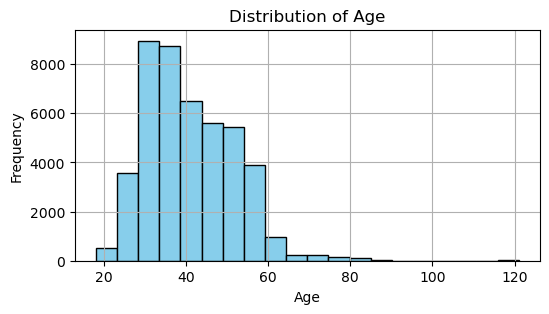

In [38]:
#Plotting histogram for age .
plt.figure(figsize=(6, 3))
plt.hist(merged_df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Insight-The age distribution appears nearly normal with some outliers. To detect outliers, use box plots or scatter plots. Handle outliers by employing methods like Z-score, mean/median/mode imputation, or log transformation. 

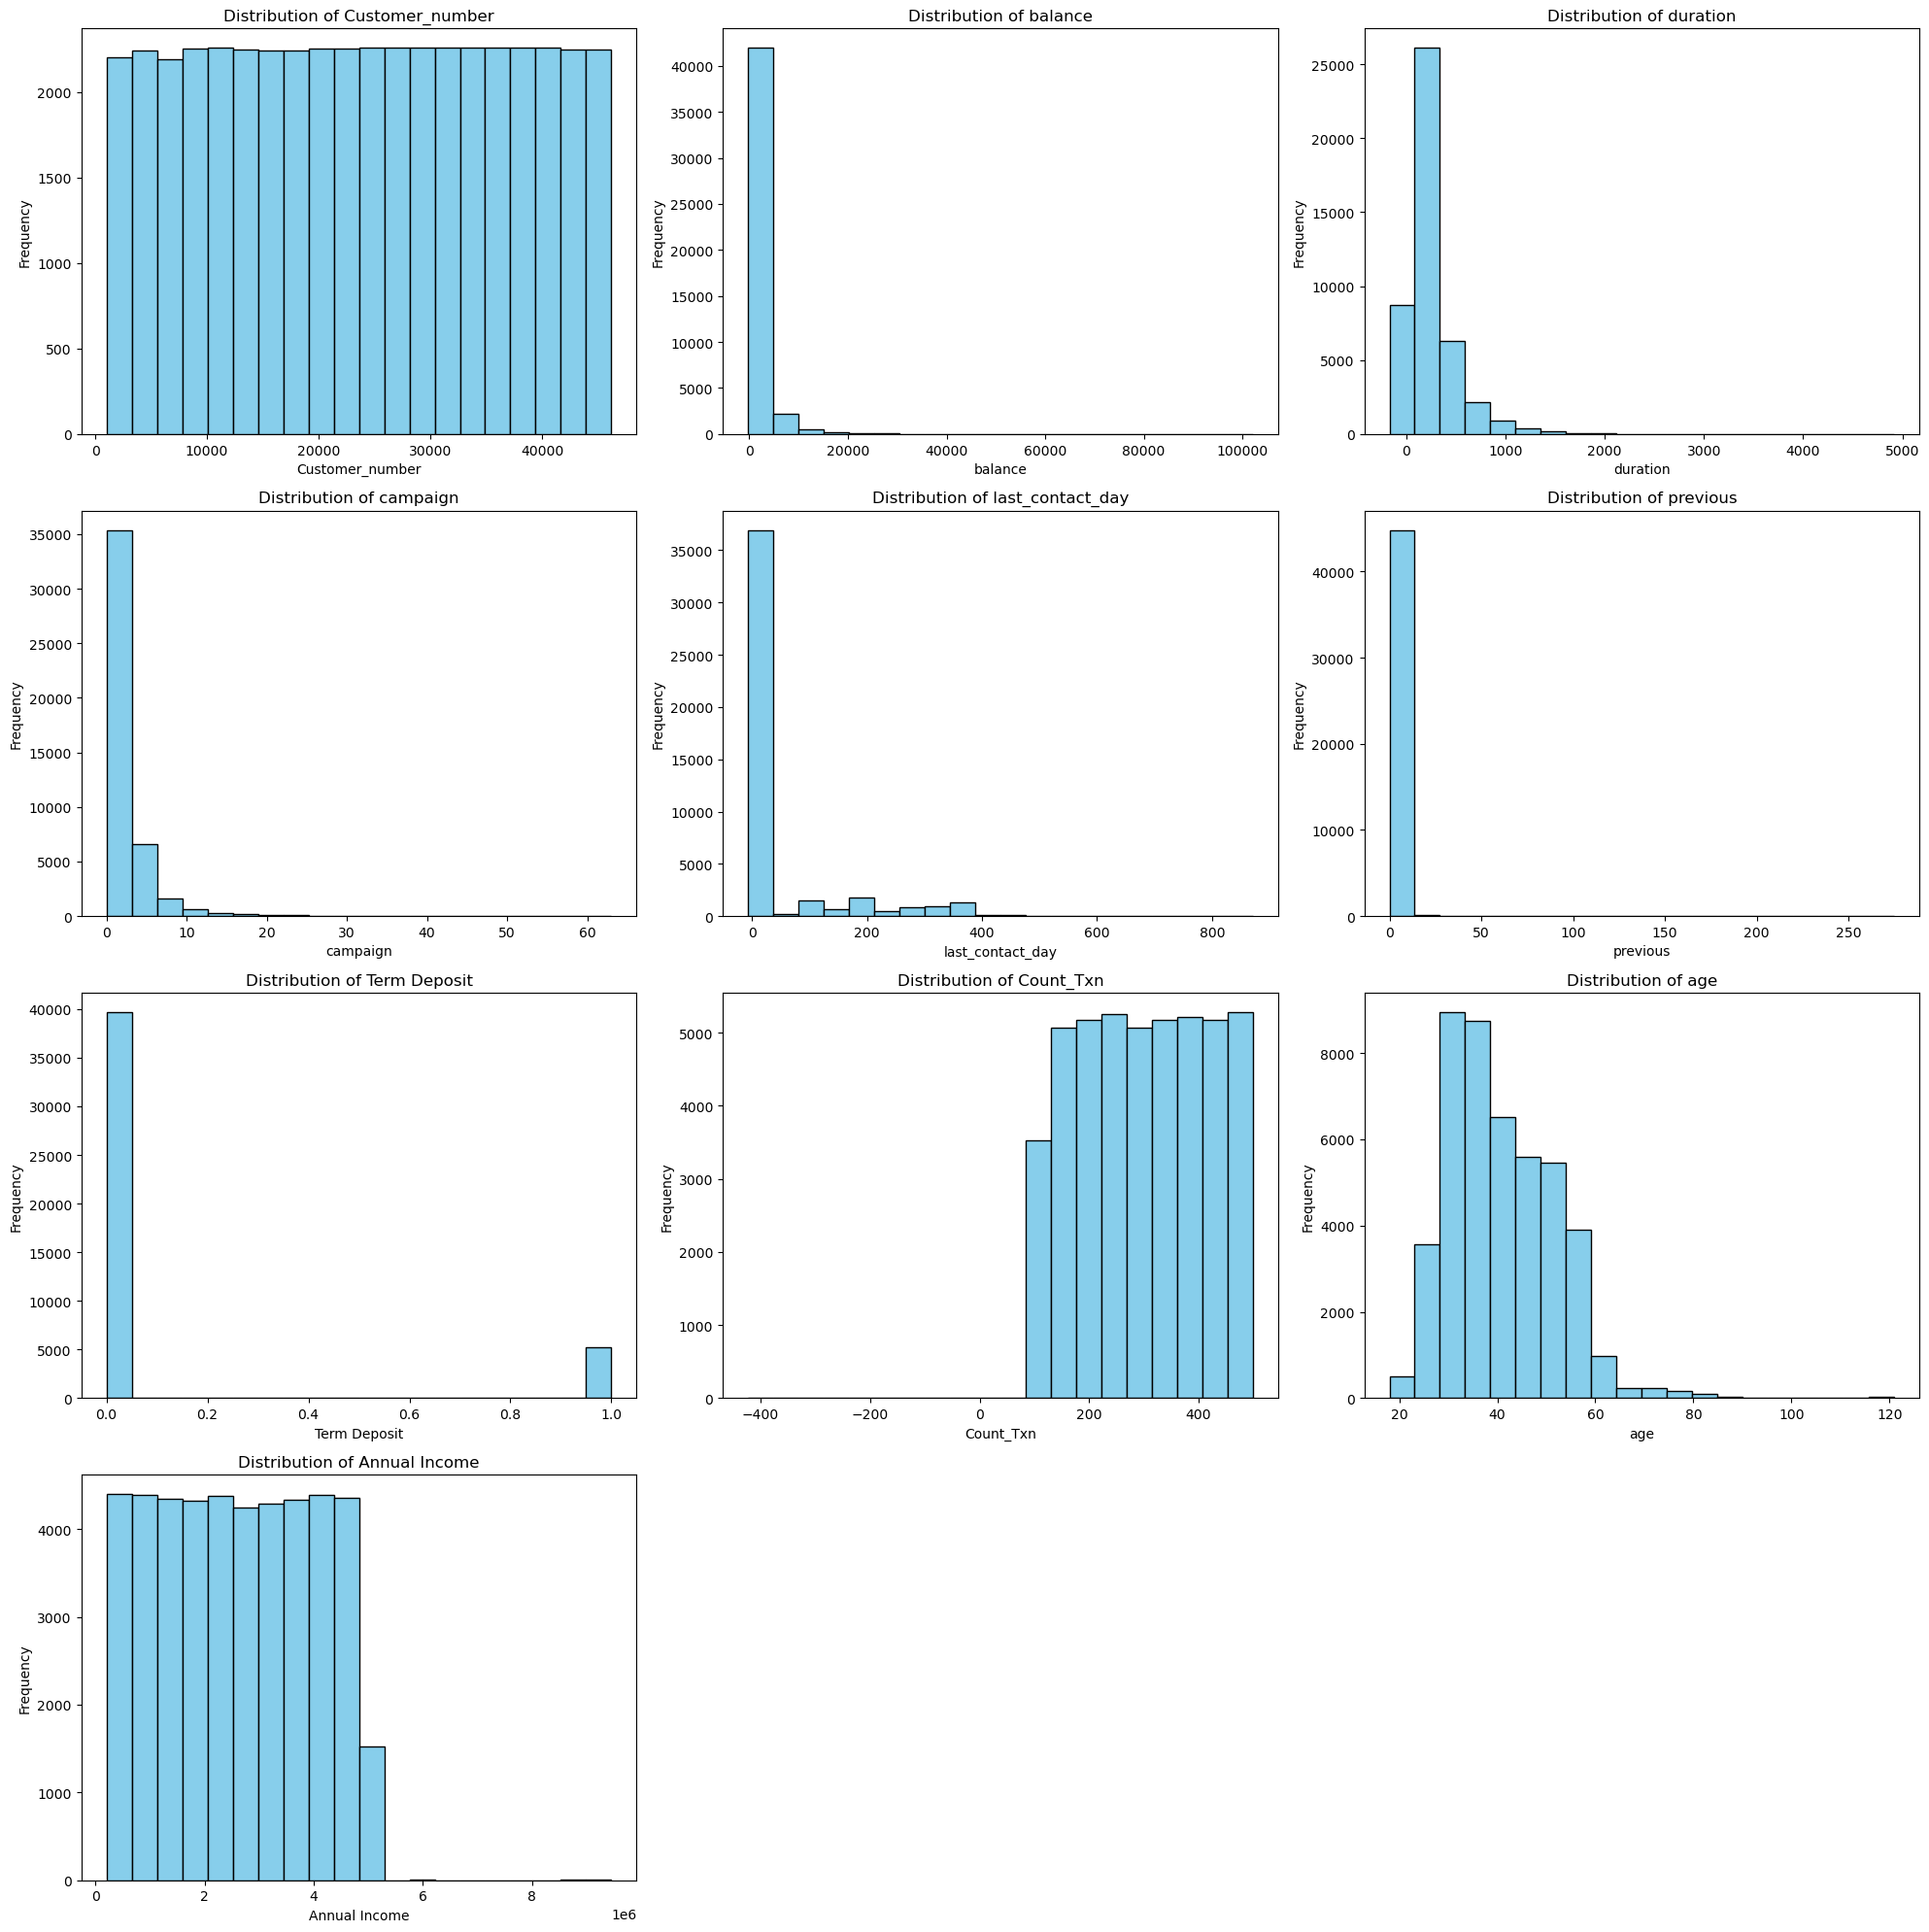

In [39]:
#Distribution for rest of the features.
num_cols = 3 
num_rows = (merged_df.select_dtypes(include=['number']).shape[1] - 1) // num_cols + 1
plt.figure(figsize=(20, 5 * num_rows))
#using for loop 
for i, col in enumerate(merged_df.select_dtypes(include=['number']).columns, 1):
    plt.subplot(num_rows, num_cols, i)
    plt.hist(merged_df[col].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Insight-The distribution of key features, including count transactions, age, annual income, and term deposit subscriptions, is predominantly right-skewed. This skewness suggests that the majority of observations cluster towards lower values, with relatively fewer instances of higher values, indicating potential asymmetry in the data distributions.

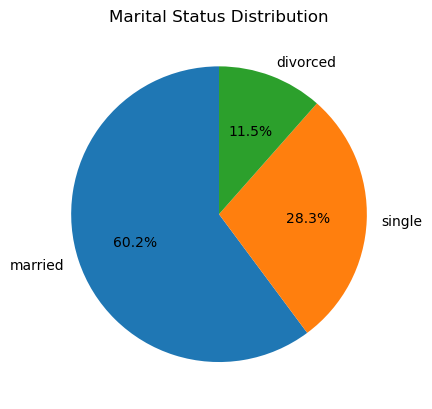

In [40]:
marital_status_counts = merged_df['marital'].value_counts()
plt.pie(marital_status_counts, labels=marital_status_counts.index, autopct="%1.1f%%", startangle=90)
plt.title('Marital Status Distribution')
plt.show()

# Insight - A substantial majority, comprising 60.2% of customers, are married and 28.3% are single and rest belongs to divorsed category as depicted by the pie chart representation. This finding underscores the significant proportion of married individuals within the customer base, suggesting potential implications for targeted marketing strategies or product offerings tailored to this demographic segment.

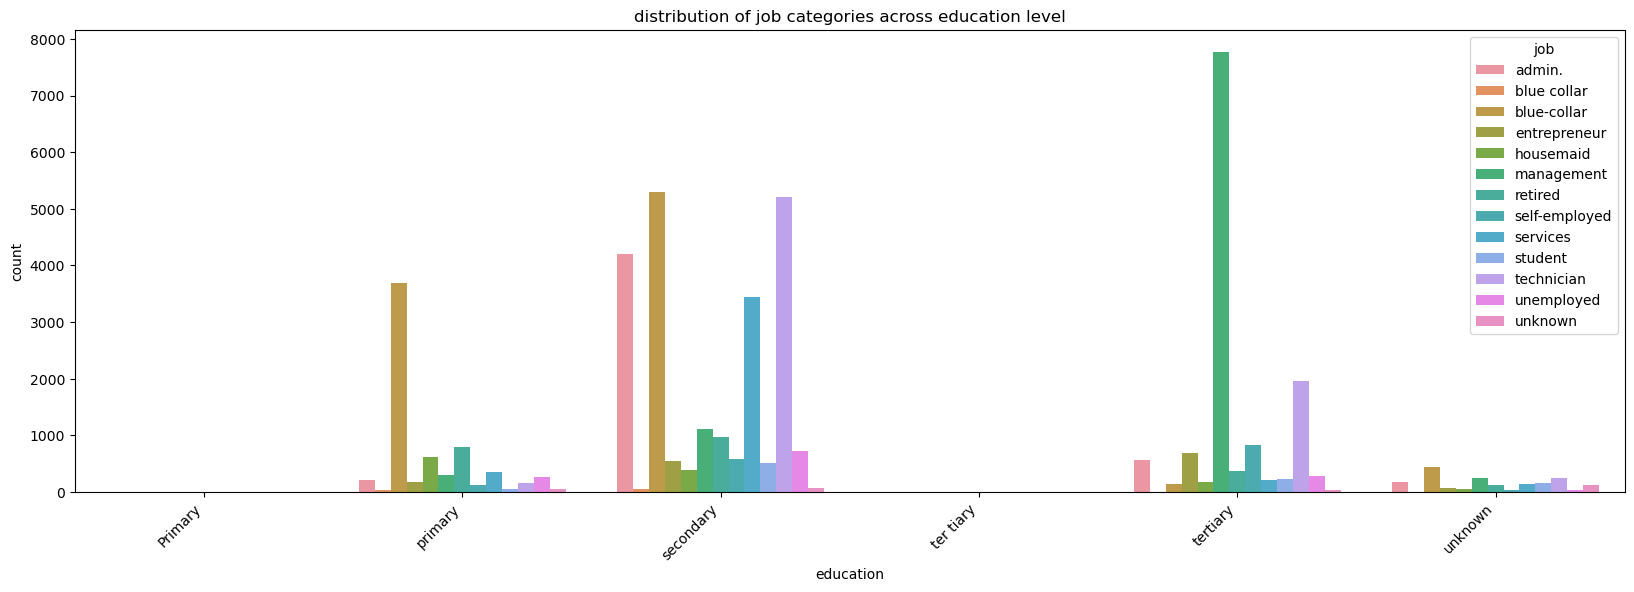

In [43]:
plt.figure(figsize=(20,6))
sns.countplot(data=merged_df,x='education',hue='job')
plt.title('distribution of job categories across education level')
plt.xticks(rotation=45,ha='right')
plt.show()

# Insight: The educational distribution among individuals reveals a predominant preference for tertiary education, followed by secondary and primary education, indicating a hierarchy in educational attainment. This trend suggests a focus on higher levels of education among the studied population, potentially influencing factors such as career paths, income levels, and consumer behaviors.

In [44]:
merged_df_new=merged_df
merged_df_new.isnull().sum()
import pandas as pd
merged_df_cleaned=merged_df_new.dropna()

In [45]:
merged_df_cleaned['balance'] = pd.to_numeric(merged_df_cleaned['balance'], errors='coerce')

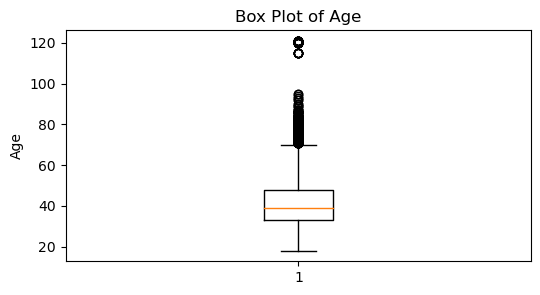

In [49]:
plt.figure(figsize=(6, 3))
plt.boxplot(merged_df_cleaned['age'])
plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.show()
#age grater than 70 considered as outlier.

# Insight-The box plot analysis of the age column reveals the presence of outliers, indicating potential anomalies or extreme age values within the dataset. Identifying and understanding these outliers is essential for maintaining data integrity and informing further investigation into their underlying causes and implications for analysis and decision-making processes.

In [50]:
Q1 = merged_df_cleaned['age'].quantile(0.25)
Q3 = merged_df_cleaned['age'].quantile(0.75)
# IQR
IQR = Q3 - Q1
#lower_fence and upper_fence 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
merged_df_new_filtered = merged_df_cleaned[(merged_df_new['age'] >= lower_bound) & (merged_df_new['age'] <= upper_bound)]

In [51]:
min_age = merged_df_new_filtered['age'].min()
max_age = merged_df_new_filtered['age'].max()
print(min_age)
print(max_age)


18
70


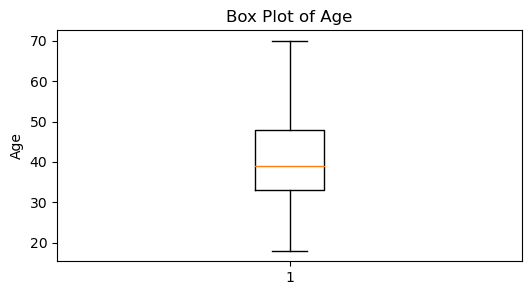

In [52]:
# Plot box of age after removing outlier.
plt.figure(figsize=(6, 3))
plt.boxplot(merged_df_new_filtered['age'])
plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.show()

# Analysis- After removing outliers the min age is 20 and maximum age is 70.

In [53]:
# Changing data types 
merged_df_new_filtered['balance'] = pd.to_numeric(merged_df_new_filtered['balance'], errors='coerce')
categorical_columns = ['Insurance', 'housing', 'loan', 'contact', 'poutcome', 'job', 'marital', 'education', 'Gender']
merged_df_new_filtered[categorical_columns] = merged_df_new_filtered[categorical_columns].astype('category')
merged_df_new_filtered['Count_Txn'] = merged_df_new_filtered['Count_Txn'].astype(int)
print(merged_df_new_filtered.dtypes)

Customer_number        int64
Insurance           category
balance              float64
housing             category
loan                category
contact             category
duration             float64
campaign               int64
last_contact_day       int64
previous               int64
poutcome            category
Term Deposit           int64
Count_Txn              int32
age                    int64
job                 category
marital             category
education           category
Annual Income        float64
Gender              category
dtype: object


In [54]:
merged_df_new_filtered.head(3)

,Customer_number,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn,age,job,marital,education,Annual Income,Gender
0,1002,no,29.0,yes,no,unknown,151.0,1,2,0,unknown,0,326,44,technician,single,secondary,1452858.0,M
1,1004,no,1506.0,yes,no,unknown,92.0,1,2,0,unknown,0,113,47,blue collar,married,unknown,3207754.0,F
2,1005,no,1.0,no,no,unknown,198.0,1,2,0,unknown,0,342,33,unknown,single,unknown,2562322.0,M


# Standardization- To make data on same scale.

In [52]:
from sklearn.preprocessing import StandardScaler
categorical_cols = ['Insurance', 'housing', 'loan', 'contact', 'poutcome', 'job', 'marital', 'education', 'Gender','Term Deposit']
continuous_cols = [col for col in merged_df_new_filtered.columns if col not in categorical_cols]

#Creating variable scaler
scaler = StandardScaler()
merged_df_standardized = merged_df_new_filtered.copy()  # Create a copy of the DataFrame
merged_df_standardized[continuous_cols] = scaler.fit_transform(merged_df_new_filtered[continuous_cols])

In [53]:
merged_df_standardized.head(2)

,Customer_number,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn,age,job,marital,education,Annual Income,Gender
0,-1.735603,no,-0.467193,yes,no,unknown,-0.413028,-0.570917,-0.399338,-0.249606,unknown,0,0.227738,0.347918,technician,single,secondary,-0.819889,M
1,-1.735449,no,0.036824,yes,no,unknown,-0.642228,-0.570917,-0.399338,-0.249606,unknown,0,-1.614995,0.649001,blue collar,married,unknown,0.440011,F


# One Hot Encoding - Converting categorical to numerical values in 0 and 1.

In [54]:
categorical_cols = ['Insurance', 'housing', 'loan', 'contact', 'poutcome', 'job', 'marital', 'education', 'Gender']
merged_df_standardized[categorical_cols] = merged_df_standardized[categorical_cols].astype('category')
merged_df_encoded = pd.get_dummies(merged_df_standardized, columns=categorical_cols)

In [55]:
def convert_tf_to_binary_categorical(merged_df_encoded):
    categorical_cols =merged_df_encoded.select_dtypes(include=['bool']).columns
    return merged_df_encoded.apply(lambda x: x.map({True: 1, False: 0}) if x.name in categorical_cols else x)

In [56]:
categorical_cols = merged_df_encoded.select_dtypes(include=['bool']).columns
merged_df_encoded[categorical_cols] = convert_tf_to_binary_categorical(merged_df_encoded[categorical_cols])

In [57]:
merged_df_encoded.head(5)

,Customer_number,balance,duration,campaign,last_contact_day,previous,Term Deposit,Count_Txn,age,Annual Income,...,marital_married,marital_single,education_Primary,education_primary,education_secondary,education_ter tiary,education_tertiary,education_unknown,Gender_F,Gender_M
0,-1.735603,-0.467193,-0.413028,-0.570917,-0.399338,-0.249606,0,0.227738,0.347918,-0.819889,...,0,1,0,0,1,0,0,0,0,1
1,-1.735449,0.036824,-0.642228,-0.570917,-0.399338,-0.249606,0,-1.614995,0.649001,0.440011,...,1,0,0,0,0,0,0,1,1,0
2,-1.735371,-0.476748,-0.230446,-0.570917,-0.399338,-0.249606,0,0.366159,-0.756050,-0.023367,...,0,1,0,0,0,0,0,1,0,1
3,-1.735294,-0.398262,-0.459645,-0.570917,-0.399338,-0.249606,0,1.646555,-0.555328,0.980507,...,1,0,0,0,0,1,0,0,0,1
4,-1.735217,-0.324553,-0.156636,-0.570917,-0.399338,-0.249606,0,0.963100,-1.257854,-0.151905,...,0,1,0,0,0,1,0,0,0,1


# Step-02--Feature selection  
                               1) Train_test_split
                               2) Principal Component Analysis -Dimensionality reduction technique
                               5) Blancing imbalanced data using SMOTE technique.
                             
                            

In [58]:
from sklearn.model_selection import train_test_split
#droping target column
X = merged_df_encoded.drop(columns=['Term Deposit']) 
y = merged_df_encoded['Term Deposit'] 
#spliting into 80:20 ratio .
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (35568, 52)
X_test shape: (8893, 52)
y_train shape: (35568,)
y_test shape: (8893,)


In [59]:
 y_train

21904    0
39225    1
7379     0
36231    0
35262    0
        ..
6272     0
11302    0
38268    0
861      0
15821    0
Name: Term Deposit, Length: 35568, dtype: int64

In [60]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)  
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance_ratio)
total_variance_ratio = sum(explained_variance_ratio)
print("Sum of explained variance ratios:", total_variance_ratio)

Explained variance ratio: [0.15913927 0.08904198 0.0822159  0.0786384  0.07649771 0.07363402
 0.06889911 0.06629953 0.04732606 0.03650553 0.03433506 0.02975314
 0.02406    0.02095574 0.0185007  0.01223222 0.01142217 0.00987335
 0.00924276 0.00780936]
Sum of explained variance ratios: 0.9563820385278643


# Balancing the dataset

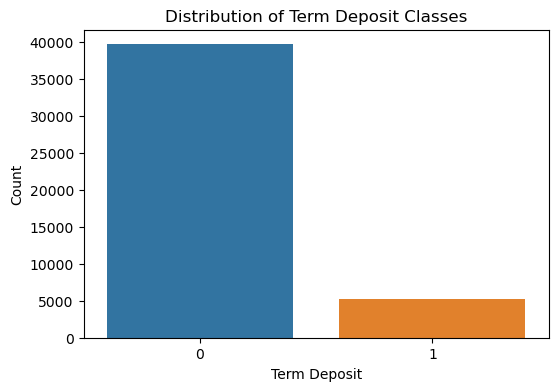

Class Counts:
Term Deposit
0    39707
1     5275
Name: count, dtype: int64


In [61]:
class_counts = merged_df['Term Deposit'].value_counts()
plt.figure(figsize=(6, 4))
sns.countplot(x='Term Deposit', data=merged_df)
plt.xlabel('Term Deposit')
plt.ylabel('Count')
plt.title('Distribution of Term Deposit Classes')
plt.show()

print("Class Counts:")
print(class_counts)

from distribution we can infer that this is imbalance data.

In [63]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pca, y_train)
print("Shape of resampled training data:", X_train_resampled.shape)
print("Shape of resampled target data:", y_train_resampled.shape)


Shape of resampled training data: (63040, 20)
Shape of resampled target data: (63040,)


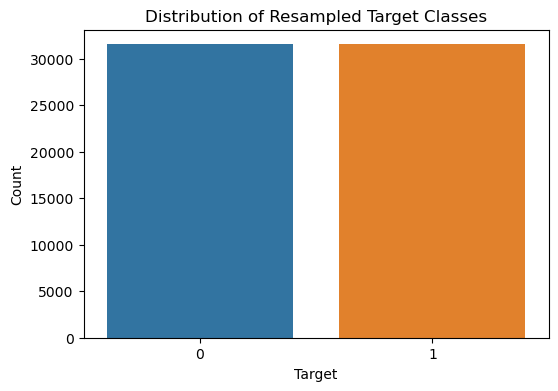

In [64]:
resampled_df = pd.DataFrame({'Target': y_train_resampled})
plt.figure(figsize=(6, 4))
sns.countplot(x='Target', data=resampled_df)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Resampled Target Classes')
plt.show()


Now the data is balanced.

In [65]:
X_train_resampled.shape

(63040, 20)

In [66]:
y_train_resampled.shape

(63040,)

In [67]:
print(X_train_pca.shape)
print(X_test_pca.shape)

(35568, 20)
(8893, 20)


# Step-03) Model creation

In [105]:
#lets compare performance wrt to other algorithms of classifications 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score

In [106]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [91]:
#dictionary = algo and object
clfs={
    'SVC':svc,
    'KN' : knc,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC': bc,
    'ETC' :etc,
    'GBDT':gbdt,
    'xgb' : xgb
}

In [107]:
def train_classifier(clf, X_train_resampled, y_train_resampled, X_test_pca, y_test):
    clf.fit(X_train_resampled, y_train_resampled)
    y_pred = clf.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

In [89]:
train_classifier(svc,X_train_resampled, y_train_resampled,X_test_pca, y_test)

(0.6871696840211402, 0.2146513115802943)

In [92]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train_resampled, y_train_resampled, X_test_pca, y_test)
    print('for', name)
    print('Accuracy-', current_accuracy)
    print('Precision-', current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


for SVC
Accuracy- 0.6871696840211402
Precision- 0.2146513115802943
for KN
Accuracy- 0.8237939952771843
Precision- 0.35521628498727736
for DT
Accuracy- 0.7897222534577758
Precision- 0.3296875
for LR
Accuracy- 0.84628359383785
Precision- 0.41021897810218977
for RF
Accuracy- 0.8876644551894749
Precision- 0.49963530269876005
for AdaBoost
Accuracy- 0.8467333858090633
Precision- 0.40587931923671994
for BgC
Accuracy- 0.8827167435061284
Precision- 0.4840085287846482
for ETC
Accuracy- 0.8984594624985944
Precision- 0.5436179981634527
for GBDT
Accuracy- 0.8330147306870572
Precision- 0.388558352402746
for xgb
Accuracy- 0.8679860564488924
Precision- 0.44954128440366975


In [93]:
performance_df = pd.DataFrame({'Algorithm': list(clfs.keys()), 'Accuracy': accuracy_scores,'Precision': precision_scores}).sort_values('Precision',ascending=False)

In [94]:
performance_df

,Algorithm,Accuracy,Precision
7,ETC,0.898459,0.543618
4,RF,0.887664,0.499635
6,BgC,0.882717,0.484009
9,xgb,0.867986,0.449541
3,LR,0.846284,0.410219
5,AdaBoost,0.846733,0.405879
8,GBDT,0.833015,0.388558
1,KN,0.823794,0.355216
2,DT,0.789722,0.329688
0,SVC,0.687170,0.214651


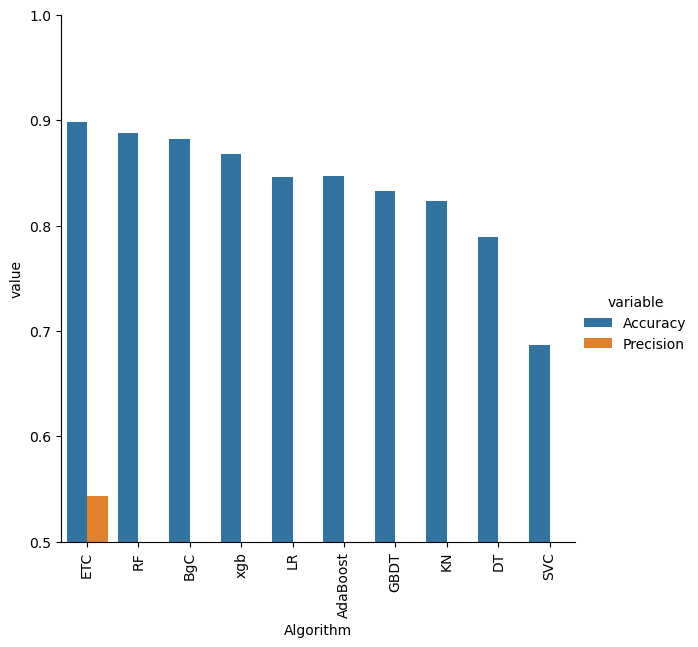

In [96]:
sns.catplot(x='Algorithm', y='value', hue='variable', data=performance_df.melt(id_vars='Algorithm'), kind='bar', height=6)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

# Insight - 1)Extra trees classifier giving best accuracy and best precision then random forest and so on . 2) Ensemble learning uses multiple machine learning models to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone. In the below task, we have used an ensemble of three models - RandomForestClassifier(), GradientBoostingClassifier(), LogisticRegression(). 

In [112]:
logistic_regression_clf = LogisticRegression()
train_accuracy, test_accuracy = evaluate_classifier(logistic_regression_clf, X_train_resampled, y_train_resampled, X_test_pca, y_test)
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
#Training accuracy is slightly more than testing it means model is little overfitted using LRC i.e low bias and high variance .

Training Accuracy: 0.8562975888324873
Testing Accuracy: 0.8463960418306533


# Answer-3) Model Improvement Strategies:
Discuss potential methods or approaches to enhance model performance. This could include feature engineering, different algorithms, or refining the data preprocessing steps.

# 1) Feature Engineering--

              a)In feature engineering new features can be created and by using correlation technique we can find the best 
                features for model for example if two features are highly correlated we can drop one feature out of two .
              b) Detecting outlier using IQR(Inter quartile range) , Z_Score , Box-plot and Scatter plot and handling them. 
              c) Checking for distribution of data -like in this given dataset some variables are rightly skewed so by                            using log normal distribution these variables can be converted to normal distribution because normal                            distribution plays a very important role in statistical analysis.
              d) Covarinace can be used to quantify relationship between variables.

# 2)Different Algorithm --
       a)I have used classification algorithms but hyperparameter tuning is required to find the best hyperparameter for 
          the model using grid_search_cv and randomized_search_cv ,optuna and many more.
       b)Ensembled methods like bagging and boosting can be used for improvement because ensemble methods uses different ML              algorithm.
       c) t-SNE algorithm can be used in place of PCA.

# 3) Data-Preprocessing --
              a) Dealing with imbalance dataset.
              b) Normalization and Standardization 
              c) One-hot-encoding for categorical varibales.
              d) Cross validation (k-fold cross validation)
              e) Performance matrix like ROC and AUC .